In [9]:
!pip install xgboost lightgbm


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: C:\Users\zarka\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
df = pd.read_csv("diabetes.csv")

In [12]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

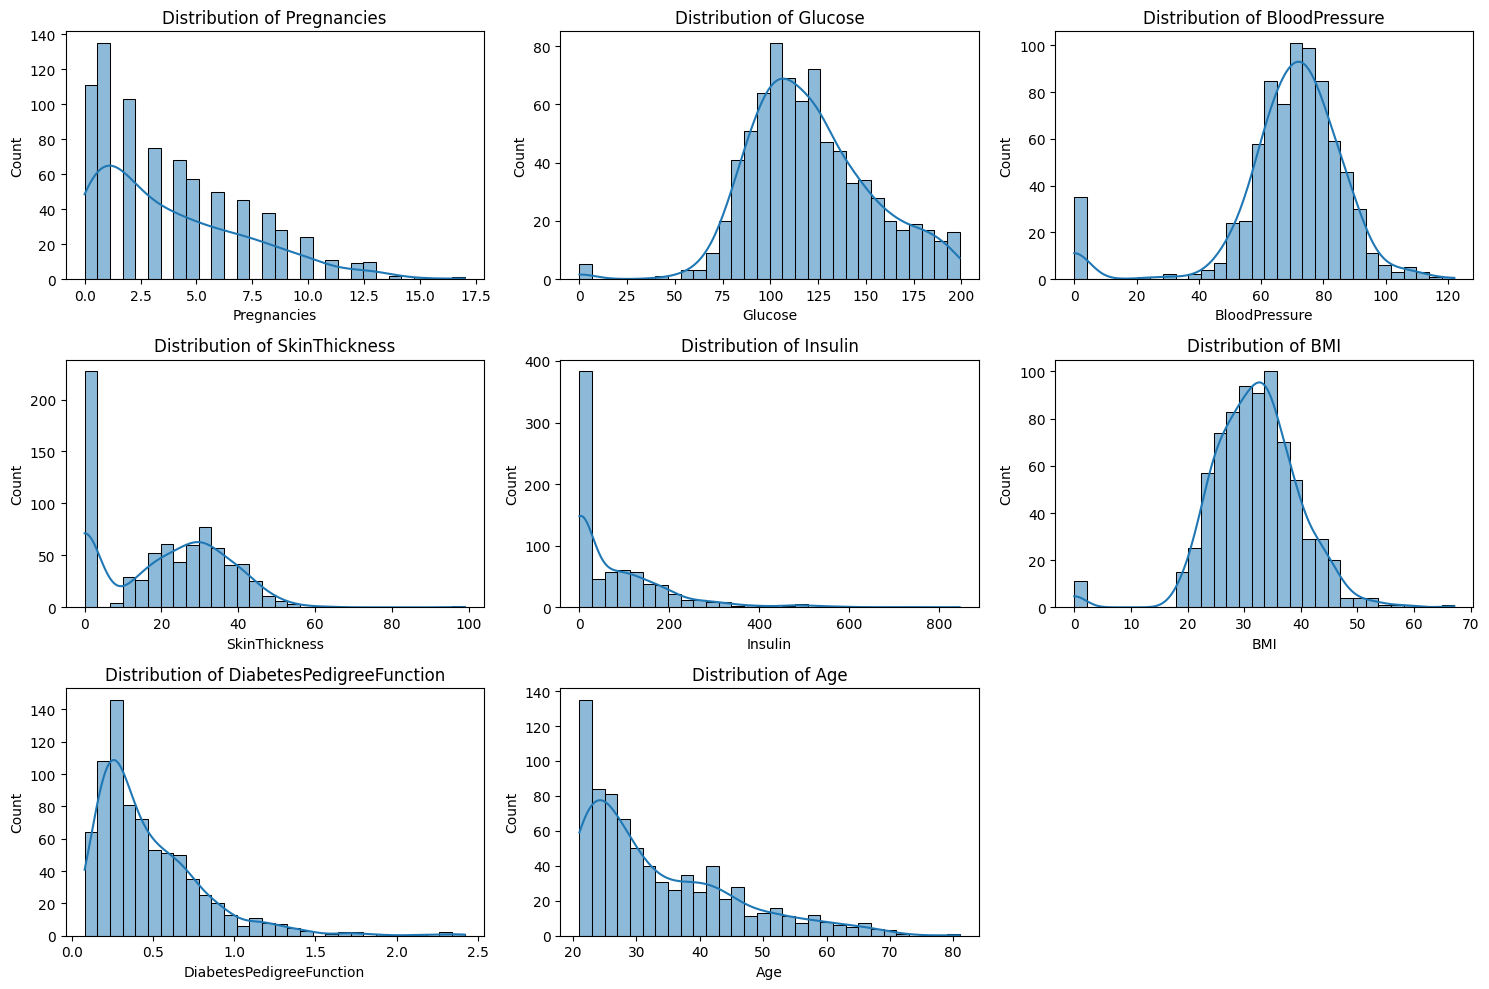

In [10]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.savefig('feature_distributions.png')
plt.close()

In [8]:
df.describe().style.background_gradient(cmap='Blues')

In [13]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [14]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0             35     30.5  33.6   
1            1     85.0           66.0             29     30.5  26.6   
2            8    183.0           64.0             23     30.5  23.3   
3            1     89.0           66.0             23     94.0  28.1   
4            0    137.0           40.0             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [13]:
df.describe().style.background_gradient(cmap='Blues')

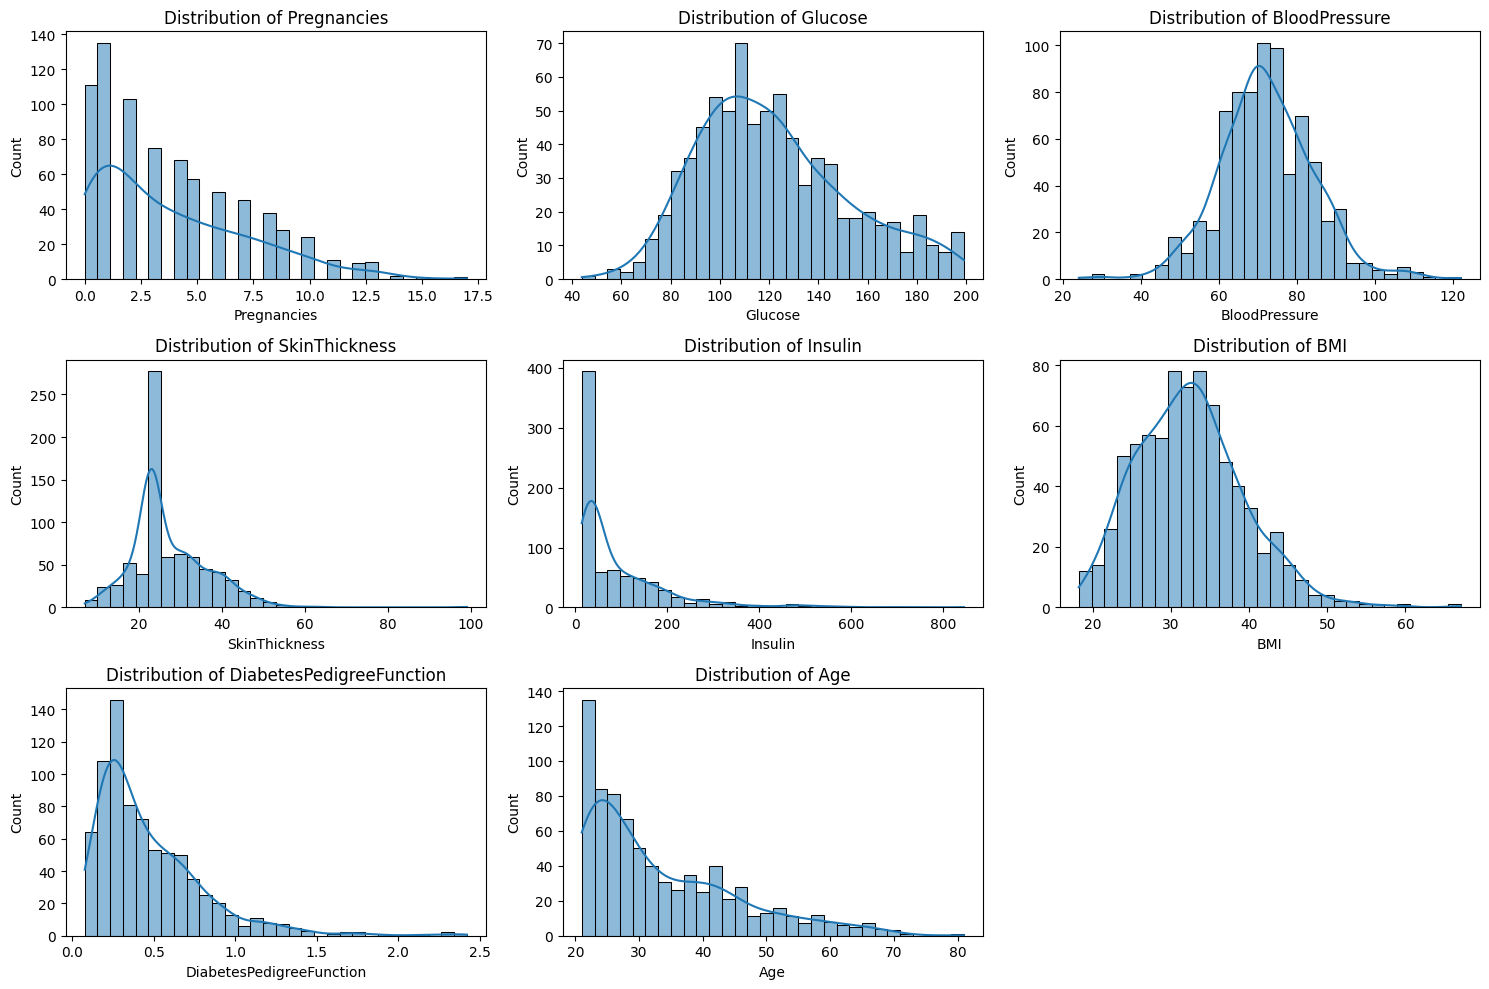

In [15]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.savefig('feature_distributions.png')
plt.close()

<Axes: >

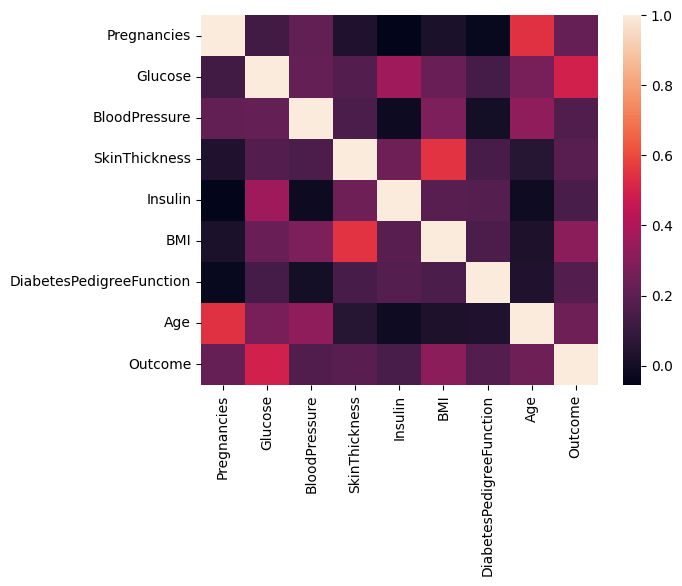

In [15]:
correlation =df.corr()
sns.heatmap(correlation)

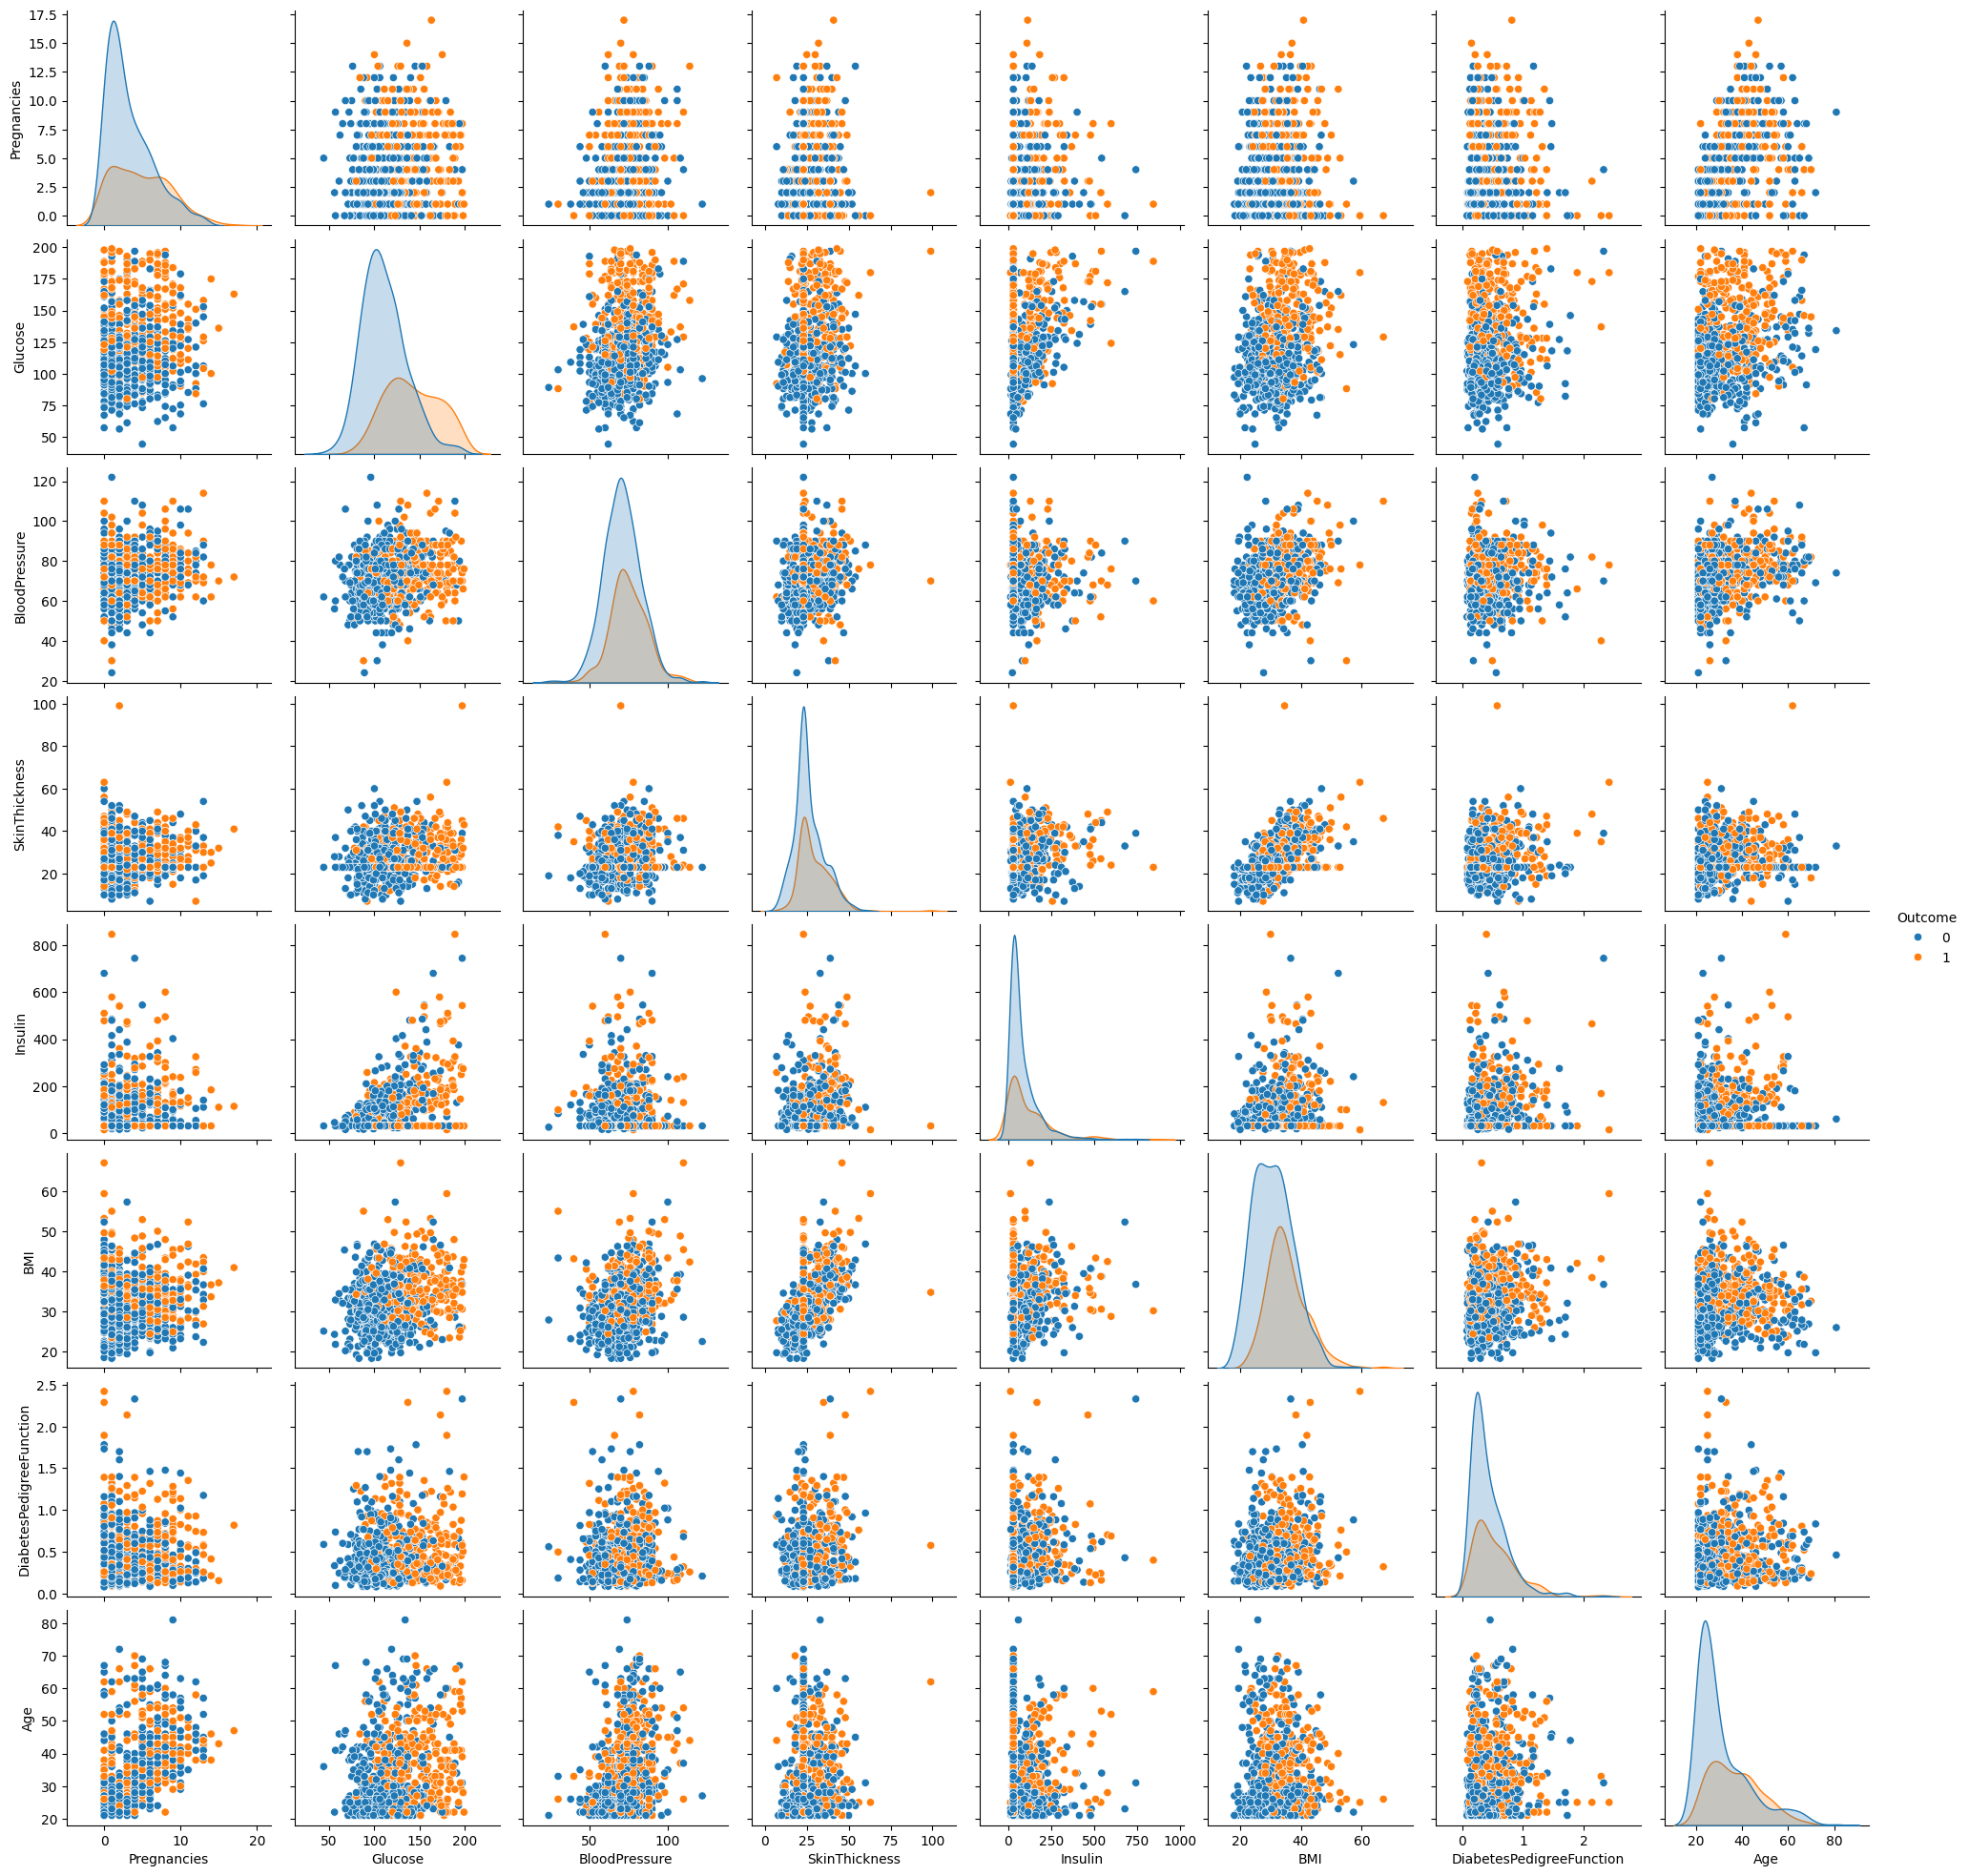

In [16]:
sns.pairplot(data=df,hue='Outcome')
plt.show()

In [16]:
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [19]:
models1 = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Linear DA": LinearDiscriminantAnalysis(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Extra Tree": ExtraTreesClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss"),
    "LightGBM": lgb.LGBMClassifier(min_gain_to_split=0.01)
}

In [20]:
trained_models_scaled = {}
for name, model in models1.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models_scaled[name] = model  # Store trained model

print("Training completed for all models.")

Training Logistic Regression...
Training Linear DA...
Training K-Nearest Neighbors...
Training Decision Tree...
Training Random Forest...
Training Extra Tree...
Training Support Vector Machine...
Training Gradient Boosting...
Training AdaBoost...
Training Naive Bayes...
Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [b

In [21]:
results_list_scaled = []

for name, model in trained_models_scaled.items():
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_list_scaled.append([name, accuracy, precision, recall, f1])

results_scaled = pd.DataFrame(results_list_scaled, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])


print(results_scaled)

[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
                     Model  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression  0.766234   0.679245  0.654545  0.666667
1                Linear DA  0.772727   0.700000  0.636364  0.666667
2      K-Nearest Neighbors  0.759740   0.660714  0.672727  0.666667
3            Decision Tree  0.701299   0.567164  0.690909  0.622951
4            Random Forest  0.772727   0.678571  0.690909  0.684685
5               Extra Tree  0.733766   0.625000  0.636364  0.630631
6   Support Vector Machine  0.759740   0.687500  0.600000  0.640777
7        Gradient Boosting  0.733766   0.609375  0.709091  0.655462
8                 AdaBoost  0.759740   0.655172  0.690909  0.672566
9              Naive Bayes  0.753247   0.644068  0.690909  0.666667
10                 XGBoost  0.701299   0.573770  0.636364  0.603448
11                LightGBM  0.733766   0.612903  0.690909 

C:\Users\zarka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [23]:
!pip install prettytable


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\zarka\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [22]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]


for name, model in trained_models_scaled.items():
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    table.add_row([name, round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4)])


print(table)

[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
+------------------------+----------+-----------+--------+----------+
|         Model          | Accuracy | Precision | Recall | F1-Score |
+------------------------+----------+-----------+--------+----------+
|  Logistic Regression   |  0.7662  |   0.6792  | 0.6545 |  0.6667  |
|       Linear DA        |  0.7727  |    0.7    | 0.6364 |  0.6667  |
|  K-Nearest Neighbors   |  0.7597  |   0.6607  | 0.6727 |  0.6667  |
|     Decision Tree      |  0.7013  |   0.5672  | 0.6909 |  0.623   |
|     Random Forest      |  0.7727  |   0.6786  | 0.6909 |  0.6847  |
|       Extra Tree       |  0.7338  |   0.625   | 0.6364 |  0.6306  |
| Support Vector Machine |  0.7597  |   0.6875  |  0.6   |  0.6408  |
|   Gradient Boosting    |  0.7338  |   0.6094  | 0.7091 |  0.6555  |
|        AdaBoost        |  0.7597  |   0.6552  | 0.6909 |  0.6726  |
|      Naive Bayes       |  0.7532

C:\Users\zarka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [23]:
top_models_scaled = results_scaled.nlargest(3, "Accuracy")["Model"].tolist()

top_model_instances = [(name, trained_models_scaled[name]) for name in top_models_scaled]

print("Top models selected for hybrid model:", top_models_scaled)

Top models selected for hybrid model: ['Linear DA', 'Random Forest', 'Logistic Regression']


In [24]:
from sklearn.ensemble import VotingClassifier

hybrid_model = VotingClassifier(estimators=top_model_instances, voting="soft")

hybrid_model.fit(X_train_scaled, y_train)

print("Hybrid model trained successfully!")

Hybrid model trained successfully!


In [25]:
y_pred_hybrid = hybrid_model.predict(X_test_scaled)

hybrid_accuracy = accuracy_score(y_test, y_pred_hybrid)
hybrid_precision = precision_score(y_test, y_pred_hybrid)
hybrid_recall = recall_score(y_test, y_pred_hybrid)
hybrid_f1 = f1_score(y_test, y_pred_hybrid)

print("Hybrid Model Performance:")
print(f"Accuracy: {hybrid_accuracy:.4f}")
print(f"Precision: {hybrid_precision:.4f}")
print(f"Recall: {hybrid_recall:.4f}")
print(f"F1-Score: {hybrid_f1:.4f}")

Hybrid Model Performance:
Accuracy: 0.7857
Precision: 0.7200
Recall: 0.6545
F1-Score: 0.6857


In [26]:
import joblib

# Save the trained model
joblib.dump(hybrid_model, 'hybrid_diabetes_model.pkl')
print("Hybrid model saved as 'hybrid_diabetes_model.pkl'")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

Hybrid model saved as 'hybrid_diabetes_model.pkl'
Scaler saved as 'scaler.pkl'


In [37]:
diabetic_case = [[8, 183, 64, 0, 0, 23.3, 0.672, 32]]
non_diabetic_case = [[1, 85, 66, 29, 0, 26.6, 0.351, 31]]


In [38]:
 
# Choose a case
input_case = diabetic_case  # or non_diabetic_case

# Scale the input using the same scaler used during training
input_scaled = scaler.transform(input_case)

# Make prediction
prediction = hybrid_model.predict(input_scaled)

# Output
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")


Prediction: Diabetic


C:\Users\zarka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
np.save('X_train_scaled.npy', X_train_scaled)

In [33]:
joblib.dump(X_train_scaled, 'static/xtrain_scaled.pkl')

['static/xtrain_scaled.pkl']

In [2]:
import pandas as pd

# Define the data
data = {
    "Sl.": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "Features": [
        "Pregnancies",
        "Glucose",
        "Blood Pressure",
        "Skin Thickness",
        "Insulin",
        "BMI",
        "Diabetes Pedigree Function",
        "Age",
        "Outcome"
    ],
    "Description": [
        "Number of times pregnant",
        "Plasma glucose concentration 2 hours in an oral glucose tolerance test",
        "Diastolic blood pressure (mm Hg)",
        "Triceps skin fold thickness (mm)",
        "2-Hour serum insulin (mu U/ml)",
        "Body mass index (weight in kg/(height in m)^2)",
        "Diabetes pedigree function",
        "Age (years)",
        "Class variable (0: Non-diabetic, 1: Diabetic)"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Style function
def style_blue_table(styler):
    return styler.set_table_styles([
        {"selector": "th", "props": [("background-color", "#4da6ff"), ("color", "white"), ("text-align", "center")]},
        {"selector": "td", "props": [("text-align", "left"), ("padding", "8px")]},
        {"selector": "tr:nth-child(even)", "props": [("background-color", "#e6f2ff")]},
        {"selector": "tr:nth-child(odd)", "props": [("background-color", "#ffffff")]}
    ])

# Apply style (without hiding index)
styled_df = df.style.pipe(style_blue_table)

# Display in Jupyter Notebook
styled_df


In [7]:
pip install shap lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: C:\Users\zarka\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [27]:
from lime.lime_tabular import LimeTabularExplainer

explainer=LimeTabularExplainer(training_data=X_train_scaled,
    feature_names=X.columns,
    class_names=['Non-Diabetic', 'Diabetic'],
    mode='classification')

In [28]:
sample_idx = 5
sample = X_test_scaled[sample_idx].reshape(1, -1)

In [29]:
exp = explainer.explain_instance(
    data_row=X_test_scaled[sample_idx],
    predict_fn=hybrid_model.predict_proba
)


In [30]:
exp.show_in_notebook(show_table=True)


In [31]:
model = xgb.XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
import shap

In [34]:
explainer = shap.Explainer(model, X_train_scaled)

In [35]:
shap_values = explainer(X_test_scaled)

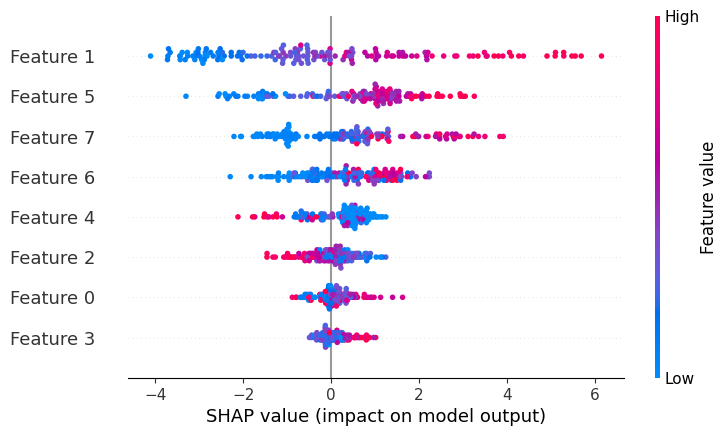

In [36]:
plt.figure(figsize=(6, 6))
shap.plots.beeswarm(shap_values)
plt.show()

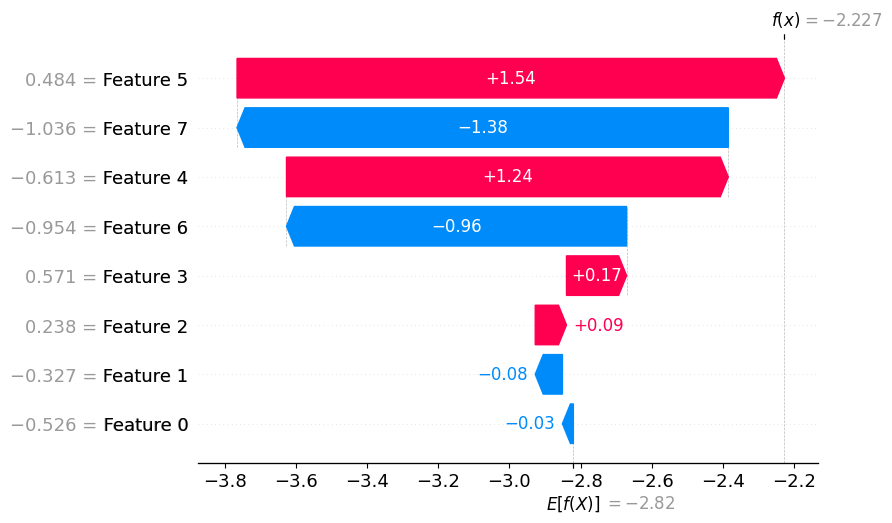

In [37]:
shap.plots.waterfall(shap_values[1])
plt.show()